# DATA WRANGLING: CRIME RATES IN NYC

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

df = pd.read_csv('nyc_crime.csv')

### Clean data
- Select the columns needed for the analysis
- Rename the columns
- Fill in the NaN values on columns that is needed for plotting variables
- Convert all the date columns to datetime format. (I am still thinking of combining the date and time but I need to check what I can do to plot it.)
- Check for duplicates. check for columns .nunique() for columns for unique values
- Separate the date and add another columns for years, months and dates

###  Select only necessary column
Columns that are needed are:'CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'

In [2]:
df = df[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 18 columns):
CMPLNT_NUM        460745 non-null int64
ADDR_PCT_CD       460745 non-null int64
BORO_NM           460430 non-null object
CMPLNT_FR_DT      460745 non-null object
CMPLNT_FR_TM      460745 non-null object
LAW_CAT_CD        460745 non-null object
OFNS_DESC         460733 non-null object
SUSP_AGE_GROUP    351550 non-null object
SUSP_RACE         351550 non-null object
SUSP_SEX          351550 non-null object
VIC_AGE_GROUP     460742 non-null object
VIC_RACE          460742 non-null object
VIC_SEX           460742 non-null object
X_COORD_CD        460745 non-null int64
Y_COORD_CD        460745 non-null int64
Latitude          460745 non-null float64
Longitude         460745 non-null float64
Lat_Lon           460745 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 63.3+ MB


### Rename columns and fill in NaN values.

In [3]:
# Rename columns.
df = df.rename(columns={"BORO_NM": "BOROUGH", "CMPLNT_FR_DT": "DATE", "CMPLNT_FR_TM": "TIME", "LAW_CAT_CD": "OFFENSE LEVEL", "ADDR_PCT_CD": "DISTRICT", "OFNS_DESC": "OFFENSE_NAME"})

# Fill in NaN values on BORO_NM
df["BOROUGH"].fillna("UNKNOWN", inplace = True) 
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,FELONY,ROBBERY,UNKNOWN,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,MISDEMEANOR,PETIT LARCENY,NaN,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,FELONY,FELONY ASSAULT,UNKNOWN,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,MISDEMEANOR,PETIT LARCENY,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,MISDEMEANOR,PETIT LARCENY,NaN,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


### Change dates to datetime format.

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

### Add columns for day, month, year and sort by date.

In [5]:
# Add Columns for Hour, Day, Weekday, Month, Year
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

#Sort By Date in descending order
df = df.sort_values('DATE')
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
125688,863566396,100,QUEENS,2015-01-01,0:00:00,FELONY,MISCELLANEOUS PENAL LAW,25-44,WHITE,F,...,WHITE,M,1035212,152992,40.586466,-73.816522,"(40.58646552900007, -73.81652172299994)",2015,1,1
436147,780908649,42,BRONX,2015-01-01,0:00:00,FELONY,SEX CRIMES,25-44,BLACK HISPANIC,M,...,BLACK HISPANIC,F,1008798,238971,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",2015,1,1
312163,996127336,50,BRONX,2015-01-01,0:00:00,MISDEMEANOR,SEX CRIMES,UNKNOWN,UNKNOWN,U,...,WHITE HISPANIC,F,1011257,261130,40.883383,-73.902333,"(40.883382579000056, -73.90233330899997)",2015,1,1
311798,160752445,18,MANHATTAN,2015-01-01,0:00:00,VIOLATION,HARRASSMENT 2,UNKNOWN,UNKNOWN,U,...,WHITE,F,987959,217674,40.764149,-73.986612,"(40.76414872600003, -73.98661223299997)",2015,1,1
360886,990576089,66,BROOKLYN,2015-01-01,0:01:00,FELONY,GRAND LARCENY,45-64,WHITE,M,...,WHITE,F,985162,169652,40.632340,-73.996716,"(40.63234026100001, -73.99671569099996)",2015,1,1


### Check that each value for `COMPLAINT_NUM` is unique.

In [6]:
# Check that each COMPLAINT NUM is unique
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique == len(df)

True

### Plotting total crimes each year in Queens
I will plot the total crimes each year in Queens to peek at the data and see if there are any abnormalities

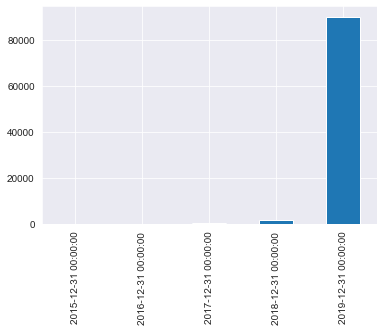

In [7]:
# Plot Queens Crime Frequency by Date 

# Create a subset dataframe by combining columns
date_boro_df = df[['DATE', 'BOROUGH']]

# Filter dataframe for QUEENS
queens = date_boro_df[date_boro_df['BOROUGH'] == 'QUEENS']

# Count the sum of occurences for each date
queens_dates = queens.DATE.value_counts()

# # Use resample to organize it into Yearly sums
queens_count = queens_dates.resample(rule='Y').apply('sum')
queens_count

# #Plot 
queens_count.plot(kind='bar')

There are fewer recorded crimes from 2015 to 2018 because NYC OpenData and NYPD Database did not merge until 2017. Because of this, there are way fewer data in those years that it will make our graphs different since it will consider years 2015 to 2018 as outliers of 2019.

## For better data, we will now focus only on crime records in 2019.

### Filter only 2019 dates from `df`

In [8]:
df = df[df['DATE'].dt.year == 2019]
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
460182,900735981,105,QUEENS,2019-01-01,15:00:00,VIOLATION,HARRASSMENT 2,NaN,NaN,NaN,...,ASIAN / PACIFIC ISLANDER,F,1056264,205572,40.730639,-73.740167,"(40.730639403000055, -73.74016656399994)",2019,1,1
460184,495588128,44,BRONX,2019-01-01,18:35:00,FELONY,CRIMINAL MISCHIEF & RELATED OF,NaN,NaN,NaN,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
455749,876271073,88,BROOKLYN,2019-01-01,1:00:00,FELONY,GRAND LARCENY,NaN,NaN,NaN,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
449662,394629573,44,BRONX,2019-01-01,15:15:00,FELONY,CRIMINAL MISCHIEF & RELATED OF,25-44,WHITE HISPANIC,M,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
460185,579035297,18,MANHATTAN,2019-01-01,2:10:00,FELONY,FELONY ASSAULT,UNKNOWN,BLACK,M,...,WHITE HISPANIC,M,987374,217550,40.763809,-73.988724,"(40.763808604000076, -73.98872409799998)",2019,1,1


## Group similar crime types into one category
Here we show every offense name occuring in the data. 

In [9]:
# Get a list of all the different crime types
def get_all_crime_types():
    result = []
    for key in df.OFFENSE_NAME.tolist():
        if key not in result:
            result.append(key)
    return result
get_all_crime_types()

['HARRASSMENT 2',
 'CRIMINAL MISCHIEF & RELATED OF',
 'GRAND LARCENY',
 'FELONY ASSAULT',
 'INTOXICATED & IMPAIRED DRIVING',
 'ASSAULT 3 & RELATED OFFENSES',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'BURGLARY',
 'FORGERY',
 'SEX CRIMES',
 'VEHICLE AND TRAFFIC LAWS',
 'PETIT LARCENY',
 'DANGEROUS WEAPONS',
 'ROBBERY',
 'OFF. AGNST PUB ORD SENSBLTY &',
 'CRIMINAL TRESPASS',
 'UNAUTHORIZED USE OF A VEHICLE',
 'OFFENSES AGAINST PUBLIC ADMINI',
 'MISCELLANEOUS PENAL LAW',
 'DANGEROUS DRUGS',
 'RAPE',
 'THEFT-FRAUD',
 'ADMINISTRATIVE CODE',
 'FRAUDS',
 'OTHER OFFENSES RELATED TO THEF',
 'MURDER & NON-NEGL. MANSLAUGHTER',
 'OFFENSES INVOLVING FRAUD',
 'NYS LAWS-UNCLASSIFIED FELONY',
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
 "BURGLAR'S TOOLS",
 'ARSON',
 'OFFENSES AGAINST THE PERSON',
 'POSSESSION OF STOLEN PROPERTY',
 'DISORDERLY CONDUCT',
 'OTHER STATE LAWS (NON PENAL LA',
 'ALCOHOLIC BEVERAGE CONTROL LAW',
 'OFFENSES RELATED TO CHILDREN',
 'PETIT LARCENY OF MOTOR VEHICLE',
 'JOSTLING',
 'THEFT O

Many offenses are similar but have different names, such as "GRAND LARCENY OF MOTOR VEHICLE" and "GRAND LARCENY" so we will combine all similar offense names into one name.  

In [10]:
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)
df[df['OFFENSE_NAME'].str.contains("LARCENY")]

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
455749,876271073,88,BROOKLYN,2019-01-01,1:00:00,FELONY,GRAND LARCENY,NaN,NaN,NaN,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
455269,938464105,46,BRONX,2019-01-01,2:34:00,FELONY,GRAND LARCENY OF MOTOR VEHICLE,25-44,BLACK,M,...,BLACK,M,1008082,247358,40.845592,-73.913864,"(40.845591766000034, -73.91386434799993)",2019,1,1
455129,828731109,5,MANHATTAN,2019-01-01,0:30:00,MISDEMEANOR,PETIT LARCENY,18-24,UNKNOWN,U,...,WHITE,F,984182,201589,40.720000,-74.000247,"(40.72000018000005, -74.00024675899994)",2019,1,1
455135,270936341,48,BRONX,2019-01-01,1:30:00,MISDEMEANOR,PETIT LARCENY,45-64,WHITE HISPANIC,M,...,WHITE HISPANIC,F,1016395,249191,40.850596,-73.883810,"(40.85059645800004, -73.88380952799997)",2019,1,1
456324,558795797,50,BRONX,2019-01-01,12:30:00,MISDEMEANOR,PETIT LARCENY,NaN,NaN,NaN,...,WHITE HISPANIC,F,1010183,258710,40.876744,-73.906227,"(40.87674365400005, -73.90622668999998)",2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,434609019,75,BROOKLYN,2019-12-31,18:00:00,MISDEMEANOR,PETIT LARCENY,NaN,NaN,NaN,...,UNKNOWN,D,1020754,176733,40.651701,-73.868447,"(40.65170090400005, -73.86844675099996)",2019,12,31
6968,855389882,45,BRONX,2019-12-31,7:38:00,FELONY,GRAND LARCENY OF MOTOR VEHICLE,UNKNOWN,UNKNOWN,M,...,BLACK HISPANIC,M,1033243,240746,40.827340,-73.822972,"(40.82734002000007, -73.82297225399996)",2019,12,31
10925,692673454,62,BROOKLYN,2019-12-31,16:50:00,MISDEMEANOR,PETIT LARCENY,25-44,WHITE HISPANIC,F,...,UNKNOWN,D,989901,159740,40.605132,-73.979650,"(40.60513212200004, -73.97965033599996)",2019,12,31
6890,483972542,84,BROOKLYN,2019-12-31,5:10:00,MISDEMEANOR,PETIT LARCENY,NaN,NaN,NaN,...,BLACK,M,989130,192790,40.695848,-73.982403,"(40.69584765600007, -73.98240305199994)",2019,12,31


In [11]:
# We want to group the following: ASSAULT, LARCENY, KIDNAPPING, HOMICIDE, FRAUD, THEFT

# Fill NaN values with "UNKNOWN"
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)

# Get all Offense Names containing "HARRASSMENT" and rename it to just "HARRASSMENT"
df.loc[df['OFFENSE_NAME'].str.contains("HARRASSMENT"), "OFFENSE_NAME"] = "HARRASSMENT"

# Get all Offense Names containing "ASSAULT" and rename it to just "ASSAULT"
df.loc[df['OFFENSE_NAME'].str.contains("ASSAULT"), "OFFENSE_NAME"] = "ASSAULT"

# Get all Offense Names containing "LARCENY" and rename it to just "LARCENY"
df.loc[df['OFFENSE_NAME'].str.contains("LARCENY"), "OFFENSE_NAME"] = "LARCENY"

# Get all Offense Names containing "KIDNAPPING" and rename it to just "KIDNAPPING"
df.loc[df['OFFENSE_NAME'].str.contains("KIDNAPPING"), "OFFENSE_NAME"] = "KIDNAPPING"

# Get all Offense Names containing "HOMICIDE" and rename it to just "HOMICIDE"
df.loc[df['OFFENSE_NAME'].str.contains("HOMICIDE"), "OFFENSE_NAME"] = "HOMICIDE"

# Get all Offense Names containing "FRAUD" and rename it to just "FRAUD"
df.loc[df['OFFENSE_NAME'].str.contains("FRAUD"), "OFFENSE_NAME"] = "FRAUD"

# Get all Offense Names containing "THEFT" and rename it to just "THEFT"
df.loc[df['OFFENSE_NAME'].str.contains("THEFT"), "OFFENSE_NAME"] = "THEFT"

# Get all Offense Names containing "UNCLASSIFIED" and rename it to just "UNCLASSIFIED"
df.loc[df['OFFENSE_NAME'].str.contains("UNCLASSIFIED"), "OFFENSE_NAME"] = "UNCLASSIFIED"

# Get all Offense Names containing "SEX CRIMES" and rename it to just "SEX CRIMES"
df.loc[df['OFFENSE_NAME'].str.contains("SEX CRIMES"), "OFFENSE_NAME"] = "SEX CRIMES"



get_all_crime_types()

['HARRASSMENT',
 'CRIMINAL MISCHIEF & RELATED OF',
 'LARCENY',
 'ASSAULT',
 'INTOXICATED & IMPAIRED DRIVING',
 'BURGLARY',
 'FORGERY',
 'SEX CRIMES',
 'VEHICLE AND TRAFFIC LAWS',
 'DANGEROUS WEAPONS',
 'ROBBERY',
 'OFF. AGNST PUB ORD SENSBLTY &',
 'CRIMINAL TRESPASS',
 'UNAUTHORIZED USE OF A VEHICLE',
 'OFFENSES AGAINST PUBLIC ADMINI',
 'MISCELLANEOUS PENAL LAW',
 'DANGEROUS DRUGS',
 'RAPE',
 'FRAUD',
 'ADMINISTRATIVE CODE',
 'OTHER OFFENSES RELATED TO THEF',
 'MURDER & NON-NEGL. MANSLAUGHTER',
 'UNCLASSIFIED',
 "BURGLAR'S TOOLS",
 'ARSON',
 'OFFENSES AGAINST THE PERSON',
 'POSSESSION OF STOLEN PROPERTY',
 'DISORDERLY CONDUCT',
 'OTHER STATE LAWS (NON PENAL LA',
 'ALCOHOLIC BEVERAGE CONTROL LAW',
 'OFFENSES RELATED TO CHILDREN',
 'JOSTLING',
 'THEFT',
 'OTHER STATE LAWS',
 'GAMBLING',
 'PROSTITUTION & RELATED OFFENSES',
 'KIDNAPPING',
 'OFFENSES AGAINST PUBLIC SAFETY',
 'ENDAN WELFARE INCOMP',
 'OTHER STATE LAWS (NON PENAL LAW)',
 'OTHER TRAFFIC INFRACTION',
 'UNKNOWN',
 'ANTICIPATORY 

We can see that many offense names containig "ASSAULT" have been grouped together into one offense name called "ASSAULT", and the same has been done for the other similar named offense names. Now that we have combined similar offense names, let's see which crimes were the most frequent.

In [12]:
df.OFFENSE_NAME.value_counts()

LARCENY                             134122
ASSAULT                              73102
HARRASSMENT                          70972
CRIMINAL MISCHIEF & RELATED OF       46314
OFF. AGNST PUB ORD SENSBLTY &        18737
MISCELLANEOUS PENAL LAW              14048
DANGEROUS DRUGS                      13367
ROBBERY                              13325
BURGLARY                             10640
OFFENSES AGAINST PUBLIC ADMINI        7540
VEHICLE AND TRAFFIC LAWS              6740
DANGEROUS WEAPONS                     6277
SEX CRIMES                            6226
FRAUD                                 6193
FORGERY                               4683
INTOXICATED & IMPAIRED DRIVING        4363
CRIMINAL TRESPASS                     3026
UNAUTHORIZED USE OF A VEHICLE         1510
POSSESSION OF STOLEN PROPERTY         1393
RAPE                                  1309
OTHER OFFENSES RELATED TO THEF        1276
OFFENSES AGAINST THE PERSON           1238
ADMINISTRATIVE CODE                   1070
UNCLASSIFIE

In [13]:
df.to_csv('./final_NYC_crimes.csv', index=False)

In [ ]:
# add the categorizing crime here